In [148]:
#importing some necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,ShuffleSplit,GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix

In [10]:
df = pd.read_csv('C:\\Users\\Muhammad Umer\\Downloads\\Bengaluru_House_Data.csv')

In [11]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [12]:
df.shape

(13320, 9)

In [13]:
#removing the unnecessary cols
df1 = df.drop(['availability','area_type','society','balcony'],axis=1)

In [14]:
df1.shape

(13320, 5)

In [15]:
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [16]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [17]:
df1.dropna(inplace=True)

In [18]:
df1.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [19]:
df1.shape

(13246, 5)

In [20]:
df1['bhk'] = df1['size'].apply(lambda x: x.split(' ')[0])
df1.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [21]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [22]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True    

In [23]:
df1[~df1['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [24]:
def to_float(x):
    try:
        global tokens
        tokens = x.split('-')    
    except:
        pass
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [25]:
to_float('23000')

23000.0

In [26]:
to_float('21-20')

20.5

In [27]:
to_float('34hdr')

In [33]:
df2 = df1.copy()
df2['total_sqft'] = df['total_sqft'].apply(to_float)

In [34]:
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [35]:
df2.iloc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [36]:
(2850 + 2100)/2

2475.0

In [56]:
df2['price_per_sqft'] = (df2.price*100000)/df2.total_sqft

In [57]:
df2.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0,4250.000000


In [58]:
location_stats = df2.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
other                   2776
Whitefield               534
Sarjapur  Road           392
Electronic City          302
Kanakpura Road           266
                        ... 
Kalkere                   10
Naganathapura             10
Nagadevanahalli           10
Nagappa Reddy Layout      10
Sadashiva Nagar           10
Name: location, Length: 254, dtype: int64

In [59]:
len(location_stats[location_stats<10])

0

In [60]:
location_less_than_10 = location_stats[location_stats<10]
len(location_less_than_10)

0

In [61]:
df2['location'] = df2['location'].apply(lambda x: 'other' if x in location_less_than_10 else x)

In [62]:
df2.location

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316                       other
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13246, dtype: object

In [63]:
df2.shape

(13246, 7)

In [64]:
df2['bhk'] = df2['bhk'].apply(to_float)

In [65]:
df3 = df2[~(df2.total_sqft/df2.bhk<300)]

In [66]:
df3.shape
df3.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')

In [67]:
def remove_outliers(df):
    outliers = pd.DataFrame()
    for key,sub_df in df.groupby('location'):
        mean = np.mean(df3.price_per_sqft)
        std = np.std(df3.price_per_sqft)
        reduced_df = sub_df[(sub_df.price_per_sqft>(mean-std)) & (sub_df.price_per_sqft<=(mean+std))]
        outliers = pd.concat([outliers,reduced_df],ignore_index = True)  
    return outliers

In [68]:
df4 = remove_outliers(df3)

In [69]:
df4.shape

(11294, 7)

In [70]:
def ploting_data(df,location):
    bhk2 = df[(df['location']==location) & (df.bhk==2)]
    bhk3 = df[(df['location']==location) & (df.bhk==3)]
    plt.rcParams['figure.figsize'] = (10,8)
    plt.scatter(bhk2.total_sqft,bhk2.price_per_sqft,color='red',marker='+',label = '2_bhk',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price_per_sqft,color='blue',marker='+',label = '3_bhk',s=50)
    plt.xlabel('Total Square Feet')
    plt.ylabel('Price Per Square Feet')
    plt.legend()
    plt.show()
    

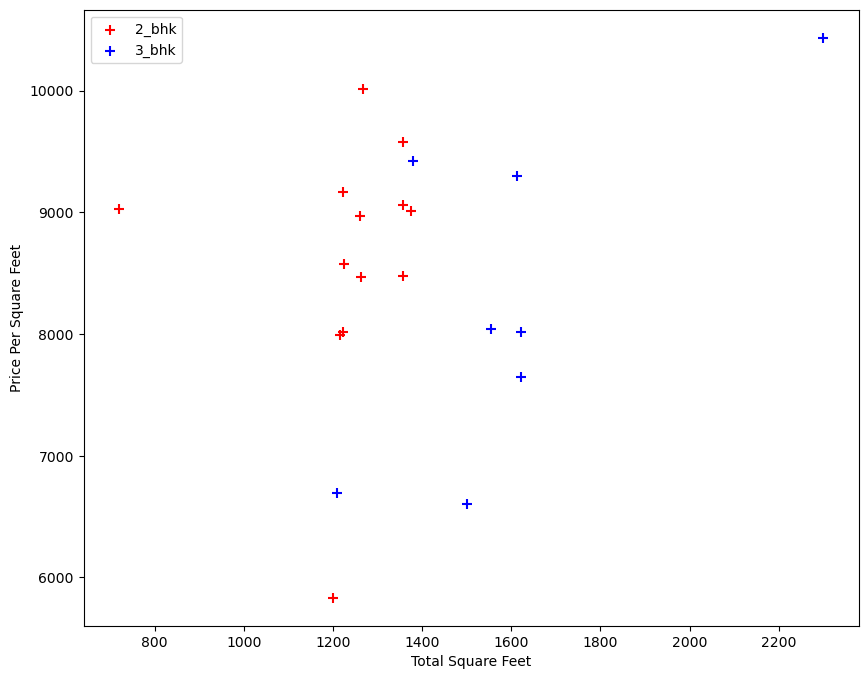

In [71]:
ploting_data(df4,'Rajaji Nagar')

In [72]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk,bhk_df in df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk,bhk_df in df.groupby('bhk'):    
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft< (stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')            

In [73]:
df5 = remove_bhk_outliers(df4)

In [89]:
df5.shape

(5959, 7)

Text(0, 0.5, 'Count')

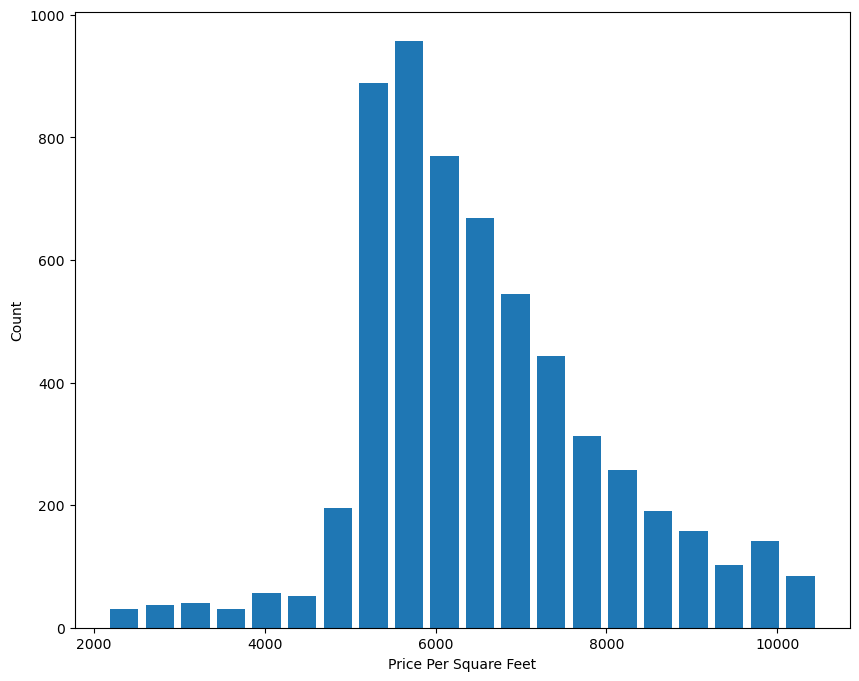

In [84]:
plt.hist(df5.price_per_sqft,bins=20,rwidth=0.8)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

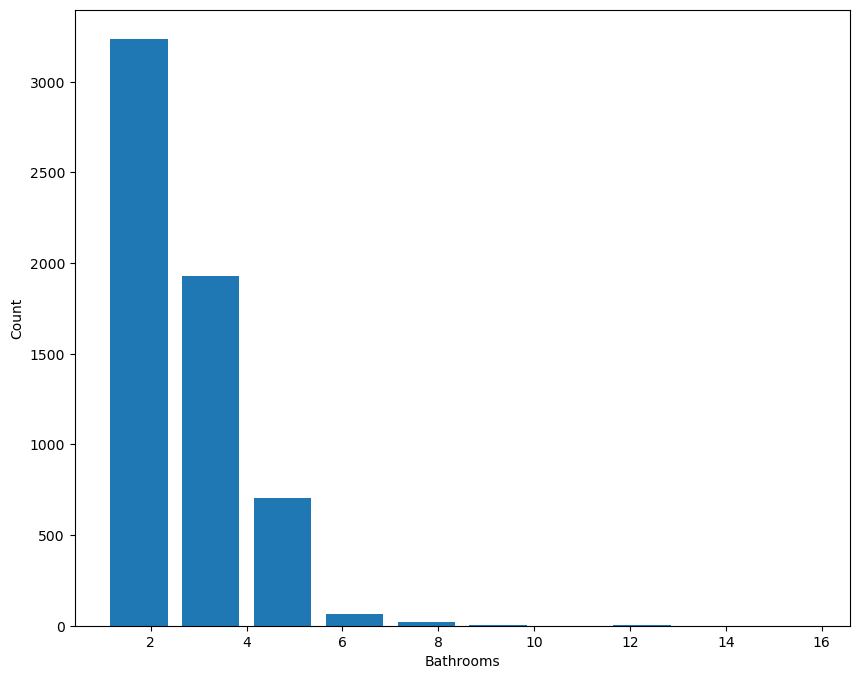

In [85]:
#ploting the bathrooms 
plt.hist(df5.bath,rwidth=0.8)
plt.xlabel('Bathrooms')
plt.ylabel('Count')

In [86]:
#looking for bathrooms outliers
df5[df5.bath>df5.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
6142,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4.0,6428.571429
7897,Thanisandra,3 BHK,1806.0,6.0,116.0,3.0,6423.034330
9687,other,6 BHK,11338.0,9.0,1000.0,6.0,8819.897689


In [87]:
df6 = df5[df5.bath < df5.bhk+2]

In [88]:
df6.shape

(5886, 7)

In [90]:
#removing the unnecessary columns
df7 = df6.drop(['price_per_sqft','size'],axis=1)
df7.head()

,location,total_sqft,bath,price,bhk
2,Devarachikkanahalli,1200.0,2.0,83.0,2.0
7,Devarachikkanahalli,1417.0,2.0,76.0,3.0
13,1st Block Jayanagar,1000.0,3.0,60.0,2.0
14,1st Block Jayanagar,1760.0,3.0,115.0,3.0
15,1st Block Koramangala,1415.0,2.0,110.0,2.0


In [91]:
#ordering the cols 
df7 = df7[['location','bhk','bath','total_sqft','price']]

In [92]:
df7.head()

,location,bhk,bath,total_sqft,price
2,Devarachikkanahalli,2.0,2.0,1200.0,83.0
7,Devarachikkanahalli,3.0,2.0,1417.0,76.0
13,1st Block Jayanagar,2.0,3.0,1000.0,60.0
14,1st Block Jayanagar,3.0,3.0,1760.0,115.0
15,1st Block Koramangala,2.0,2.0,1415.0,110.0


In [98]:
#shifting the location column into dummies
dummies = pd.get_dummies(df7.location,dtype = int,drop_first=True)
dummies

,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11287,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11288,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11289,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11290,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [99]:
df7 = pd.concat([df7,dummies],axis=1)

In [100]:
df7.head()

,location,bhk,bath,total_sqft,price,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
2,Devarachikkanahalli,2.0,2.0,1200.0,83.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Devarachikkanahalli,3.0,2.0,1417.0,76.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,1st Block Jayanagar,2.0,3.0,1000.0,60.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,1st Block Jayanagar,3.0,3.0,1760.0,115.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,1st Block Koramangala,2.0,2.0,1415.0,110.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
df8 = df7.drop('location',axis=1)

In [103]:
df8.head()

,bhk,bath,total_sqft,price,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
2,2.0,2.0,1200.0,83.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3.0,2.0,1417.0,76.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,2.0,3.0,1000.0,60.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,3.0,3.0,1760.0,115.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,2.0,2.0,1415.0,110.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
df8 = df8.reset_index(drop = True)
df8.head()

,bhk,bath,total_sqft,price,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2.0,2.0,1200.0,83.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,2.0,1417.0,76.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,3.0,1000.0,60.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,3.0,1760.0,115.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,1415.0,110.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
df8.shape

(5886, 247)

In [109]:
# splitting the data into x and y
X = df8.drop('price',axis=1)
y = df8.price

In [110]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [112]:
model = LinearRegression()

In [113]:
model.fit(X_train,y_train)

LinearRegression()

In [114]:
model.score(X_test,y_test)

0.8785294699064814

In [115]:
cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

In [116]:
score = cross_val_score(model,X,y,cv=cv)
score

array([0.93685573, 0.89404758, 0.87039825, 0.88115552, 0.87373003])

In [117]:
model.score(X_train,y_train)

0.9092288508096728

In [135]:
def findig_best_model(X,y):
    algos = {
        'LinearRegression':
     {
        'model':LinearRegression(),
        'params' :{
             
           }
        } , 
    'LassoRegression':
     {
        'model':Lasso(),
        'params' :{
             'alpha':[1,2],
             'selection':['random','cyclic']
           }
        },
    'DecisionTree':
     {
        'model':DecisionTreeRegressor(),
        'params' :{
            'criterion':['squared_error','friedman_mse'],
            'splitter':['best','random']
           }
        }  
    }
    scores = []
    for model_name,config in algos.items():
        cv = ShuffleSplit(n_splits= 5,test_size=0.25,random_state=0)
        gs = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'Model_name':model_name,
            'best_score':gs.best_score_,
            'best_parameter':gs.best_params_
        })
    return pd.DataFrame(scores,columns=['Model_name','best_score','best_parameter'])    

In [136]:
findig_best_model(X,y)

,Model_name,best_score,best_parameter
0,LinearRegression,0.885246,{}
1,LassoRegression,0.877176,"{'alpha': 2, 'selection': 'random'}"
2,DecisionTree,0.818043,"{'criterion': 'squared_error', 'splitter': 'ra..."


In [173]:
def price_prediction(location,bhk,bath,sqft):
    try:
        loc_index_array = np.where(X.columns == location)[0]
        loc_index = loc_index_array[0] if len(loc_index_array) > 0 else -1

        x = np.zeros(len(X.columns))
        x[0] = bhk
        x[1] = bath
        x[2] = sqft

        if loc_index >= 0:
            x[loc_index] = 1

        return model.predict([x])[0]
    except Exception as e:
        return f"Error: {e}"

In [174]:
price_prediction('Whitefield',2,3,1000)

C:\Users\Muhammad Umer\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([63.94291704])

In [177]:
price_prediction('1st Phase JP Nagar',2,2,1000)

C:\Users\Muhammad Umer\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([88.77597262])

In [178]:
import pickle

In [179]:
with open('bangeluru_house_price_predection.pickel','wb') as f:
    pickle.dump(model,f)
    

In [180]:
import json

In [181]:
columns = {
    'data_columns':[cols.lower() for cols in X.columns]
}

In [183]:
with open('data_columns.json','w') as f:
    f.write(json.dumps(columns))